# Proyek Analisis Data:E-commerce-public-dataset
- Nama: Habellio Tifano
- Email: habelliotifano@gmail.com
- Id Dicoding: kuretha

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling laku dan tidak ?
- Bagaimana tingkat kepuasan pelanggan terhadap pelayanan yang telah diberikan?
- Provinsi mana yang memiliki banyak pelanggan ?

## Menyiapkan semua library yang dibuthkan

In [144]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import folium
import unicodedata
from folium.plugins import HeatMap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # untuk memuat banyak output

## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv('data\customers_dataset.csv')
geolocation_df = pd.read_csv('data\geolocation_dataset.csv')
order_items_df = pd.read_csv('data\order_items_dataset.csv')
order_payments_df = pd.read_csv('data\order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data\order_reviews_dataset.csv')
orders_df = pd.read_csv('data\orders_dataset.csv')
product_category_df = pd.read_csv('data\product_category_name_translation.csv')
products_df = pd.read_csv('data\products_dataset.csv')
sellers_df = pd.read_csv('data\sellers_dataset.csv')

data = {'customer_df': customer_df,
        'geolocation_df': geolocation_df,
        'order_items_df': order_items_df,
        'order_payments_df': order_payments_df,
        'order_reviews_df': order_reviews_df,
        'orders_df': orders_df,
        'product_category_df': product_category_df,
        'products_df': products_df,
        'sellers_df': sellers_df}

In [3]:
data['customer_df'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
data['geolocation_df'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
data['order_items_df'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
data['order_payments_df'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
data['order_reviews_df'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
data['orders_df'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
data['product_category_df'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
data['products_df'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
data['sellers_df'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


####  Insight

- Setelah meninjau kumpulan data  dari data e-commerce, dapat disimpulkan beberapa insight. Customers_df menyoroti basis pelanggan yang beragam dengan representasi yang signifikan di berbagai kota, yang menunjukkan seberapa luas jangkauan geografis e-commerce tersebut. Order_df menunjukan waktu untuk order diproses ke konsumen.


### Assessing Data

In [12]:
for df_name, df in data.items():
  print('\n', df_name, data[df_name].columns)


 customer_df Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

 geolocation_df Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

 order_items_df Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

 order_payments_df Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

 order_reviews_df Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

 orders_df Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered

check all dtype

In [13]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

Check column with null value

In [14]:
for df_name, df in data.items():
  print('\n', data[df_name].isnull().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 order_id                            0
customer_id                       

Check column with duplicate value

In [15]:
for df_name, df in data.items():
  print('\n', df_name, data[df_name].duplicated().sum())


 customer_df 0

 geolocation_df 261831

 order_items_df 0

 order_payments_df 0

 order_reviews_df 0

 orders_df 0

 product_category_df 0

 products_df 0

 sellers_df 0


In [16]:
for df_name, df in data.items():
  print('\n', df_name, 'table\n', data[df_name].describe(include='all'))


 customer_df table
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_

#### Insight
beberapa data memiliki null value(review_comment_title, dll.), duplicate(geolocation_df), dan data type yg kurang tepat(kolom tanggal yg memiliki dtype object), perlu dibersihkan untuk sebelum dilakukan analysis

### Cleaning Data

karena aku akan melakukan geospacial analysis mungkin duplicate value geolocation tidak di drop, karena memiliki kolom city location

clean orders df, change the dtype to date time

In [17]:
date_col = ['review_creation_date','review_answer_timestamp']
for col in date_col:
    data['order_reviews_df'][col] = data['order_reviews_df'][col].apply(pd.to_datetime, errors='coerce')

In [18]:
data['order_reviews_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


clean order reviews, aku ga pakai review_comment, NaN value terlalu tingi dan ga melakukan text analysis

In [19]:
data['order_reviews_df'].drop(['review_comment_title', 'review_comment_message'], axis= 1, inplace= True)

In [20]:
# show the cleaned ver
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

change dtype order col  to date to datetime  

In [21]:
orders_to_datetime=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_to_datetime:
    data['orders_df'][col]=data['orders_df'][col].apply(pd.to_datetime, errors='coerce')

In [22]:
data['orders_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


clean product df, NaN value tinggi dan aku ga bakal analysis pake kolomnya

In [23]:
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products_df'].drop(product_drop_cols, axis= 1, inplace= True)

In [24]:
data['products_df'].head()

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0


#### Insight
Data sudah terlihat sesuai dan siap untuk dilakukan EDA

## Exploratory Data Analysis (EDA)

### Explore customers

In [25]:
data['customer_df'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
4771,76fc04d3933d98cc61911a19a2b42651,4112de7d8c398bd7c90cc4b3e9cfef39,11335,sao vicente,SP
128,c82a5e4fafdbeb34f08928ccfba27d14,ca19a17e381182923b66007a351574b7,85854,foz do iguacu,PR
10779,00bf77539bad79ed21c55cdea4375985,6e066424e17b2da4b735194531fb99a6,88070,florianopolis,SC
69110,b57a5ecb737d245afaf5bbcdd8e0375e,515d3550e900372e765ad518fccee139,45020,vitoria da conquista,BA
16080,ffb17239ca39724cfadc2b50d510f10d,b57e60919a49a273cd91a34e88f9da28,9725,sao bernardo do campo,SP


In [26]:
data['customer_df'].describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [27]:
data['customer_df'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [28]:
data['customer_df'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

#### Insight
dapat dilihat Sao Paulo city dan state punya customer paling banyak

### Explore Payment

In [29]:
data['order_payments_df'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
61103,c1fad8c885084c5b05f3bd5e2dd56218,2,voucher,1,100.00
70867,9b49f06c590d69abbccae35ce08c2d8c,1,credit_card,2,65.79
47900,11746f9dc3d55313aadc6e6bf8464595,1,credit_card,1,47.13
50062,c7ba15ecd1fd8d61a97c320e8d28f41d,1,credit_card,1,187.06
72682,e5ee38b54f1a799f6e122d67768cc1b2,1,credit_card,1,134.38


In [30]:
data['order_payments_df'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

#### Insight
credit card memiliki jumlah terbanyak disini

### Explore Order

In [31]:
data['orders_df'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
41703,bd5f96c3f69f19e9e3ff6b3ed0c6a58e,394b4a9c7bdcf6237035a7b88814dfbb,delivered,2018-03-11 14:25:06,2018-03-11 14:35:46,2018-03-13 19:56:38,2018-04-03 16:46:56,2018-04-10
69904,ea5f0ecb07aab01d50c4a3089bb010c7,e499450a060a376c46c82653e112e81d,delivered,2018-02-04 23:55:29,2018-02-06 04:32:33,2018-02-06 18:07:22,2018-02-15 18:48:27,2018-03-08
60990,2fe3e3ee7c1249743f3c7391c05042b3,d711fca0d2d48b5a43b009956e220042,delivered,2018-02-09 18:22:59,2018-02-09 18:35:24,2018-02-16 19:58:57,2018-02-26 23:38:40,2018-03-07
93571,4088827527ce8c088c35a2e493940b55,5fbb84d18cf3be4cc5e3a77ad95bda71,delivered,2017-09-07 19:38:09,2017-09-07 19:50:26,2017-09-12 21:48:52,2017-09-24 15:47:39,2017-10-05
36829,e98379ee17e55f764423de1d693daf42,9d8a8652100cbf0cdcfbb06ce031c9ac,delivered,2018-01-30 10:37:04,2018-01-30 11:15:31,2018-02-01 17:08:39,2018-02-02 17:56:06,2018-02-15


In [32]:
delivery_time = data["orders_df"]['order_delivered_customer_date'] - data["orders_df"]["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
data["orders_df"]["delivery_time"] = round(delivery_time/86400)

menambah kolom delivery_time 

In [33]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
91472,260c1e77793a506e09dd0f8135109966,a06e9a7060cee74dbde1a2d5d7117747,delivered,2018-08-17 06:37:13,2018-08-17 07:31:20,2018-08-17 14:53:00,2018-08-21 22:03:42,2018-08-28,4.0
17828,852ec507c9db5b3b1086cb9e6d89c697,2ffc1f71cc3fcf1f2baf2d9ebac6b29a,delivered,2018-06-29 23:09:13,2018-06-29 23:30:13,2018-07-03 13:57:00,2018-07-06 13:46:57,2018-07-31,3.0
45292,9e94c3cecb444012ef6ee92df4ef0b0e,f56091c3fb2ee9ba23d99dd40a11cb7b,delivered,2017-07-07 08:56:20,2017-07-07 09:10:12,2017-07-10 19:56:51,2017-07-12 17:47:28,2017-07-20,2.0
93025,8a8bd4a338e17ace44431e99a2add1d2,460a1052bb04a53c2d748b89ef49f1c5,delivered,2018-05-15 21:31:55,2018-05-15 21:54:02,2018-05-17 12:40:00,2018-05-29 18:51:46,2018-06-01,12.0
47947,8e2f6e8aa36fa3770c9f33a7129e81a7,70d21c84f9843a2413b5921d5fb12add,delivered,2018-01-02 16:08:11,2018-01-04 05:14:03,2018-01-08 15:30:20,2018-01-23 13:32:47,2018-02-02,15.0


<AxesSubplot:>

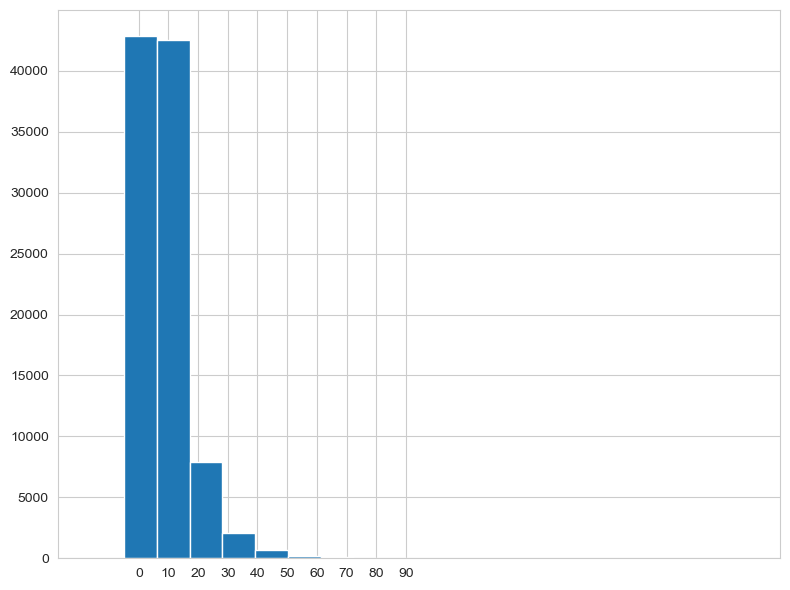

In [34]:
fig, delivery_time_plot = plt.subplots(figsize=(8, 6))
data["orders_df"].delivery_time.hist(bins = 20)
delivery_time_plot.set_xticks(np.arange(0, 100, 10))
plt.tight_layout() 
plt.show()

#### Insight
waktu pengiriman bervariasi, jumlah terbanyak terdapat di bawah 20

### Explore Customer dan Order

In [35]:
cust_order_df = pd.merge(
    left=data['customer_df'],
    right=data['orders_df'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


#### Insight
Menggabungkan customer_df dan orders_df untuk keperluan analis berikutnya

### Explore Payment dan Review

In [36]:
pay_rev_df = pd.merge(
    left=data['order_payments_df'],
    right=data['order_reviews_df'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
pay_rev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21,2017-12-22 01:10:39


In [37]:
pay_rev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [38]:
pay_rev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Insight
customer banyak menggunakan credit card sebagai alat pembayaran dan payment_value yg menggunakan credit card juga memiliki jumlah paling besar

### Explore Cust_Order dan Pay_Rev

In [39]:
cust_order_pay_rev_df = pd.merge(
    left=cust_order_df,
    right=pay_rev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
cust_order_pay_rev_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,2.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,14.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,3.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,10.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


#### Insight
menggabungkan cust_order_df dan pay_rev_df untuk dilakukan analisis lanjutan

### Explore Seller dan Item

In [40]:
item_seller_df = pd.merge(
    left=data['order_items_df'],
    right=data['sellers_df'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [41]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

#### Insight
seller banyak berdomisili di kota Sao Paulo

### Explore Product dan Product Category

In [42]:
product_df = pd.merge(
    left=data['products_df'],
    right=data['product_category_df'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [43]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [44]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Insight
banyak seller yang menjual barang category bed_bath_table dan diikuti oleh sport_leisure

### Explore Item_Seller & Prod_Prod Category

In [45]:
sellers_prod_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_prod_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [46]:
sellers_prod_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,3.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,3.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,5.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,5.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


3 category termahal dimiliki oleh computer, housewares, dan art 

In [47]:
sellers_prod_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

#### Insight
- cateogry art memiliki harga paling mahal disini
- bed_bath_table memiliki jumllah order paling banyak

### Explore Geolocation

In [48]:
data['geolocation_df'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
431188,21555,-22.850967,-43.359165,rio de janeiro,RJ
626923,37200,-21.241661,-44.996368,lavras,MG
320143,13825,-22.632235,-47.052371,holambra,SP
64404,3689,-23.527556,-46.480912,sao paulo,SP
720749,55660,-8.233606,-35.751306,bezerros,PE
8974,1307,-23.549318,-46.654087,são paulo,SP
484142,25250,-22.600438,-43.291702,duque de caxias,RJ
148641,6020,-23.536953,-46.760524,osasco,SP
395926,18830,-23.400791,-49.346348,tejupa,SP
55560,3309,-23.548646,-46.558927,sao paulo,SP


In [49]:
data['geolocation_df'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

zipcode 24220 memiliki jumlah yg banyak

In [50]:
data['geolocation_df'][data['geolocation_df']['geolocation_zip_code_prefix'] == 24230].head() 

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


Setelah diteliti ternyata berada di kota niteroi

#### Insight
zipcode 24220(kota niteroi) memiliki jumlah yg banyak, 

### Explore All Data

geolocation sepertinya kuran relevan untukk dimasukan ke sini

In [51]:
# merge semua data
all_data = pd.merge(
    left=cust_order_pay_rev_df,
    right=sellers_prod_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,NaN,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


Melakukan Wranling pada all data

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

ubah ship limit date ke datetime

In [53]:
ship_date_col = ['shipping_limit_date']
for col in ship_date_col:
    all_data[col] = all_data[col].apply(pd.to_datetime, errors='coerce')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [54]:
all_data.duplicated().sum()

0

In [55]:
print(all_data.isnull().sum())

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
delivery_time                    3422
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                        1000
review_score                     1000
review_creation_date             1000
review_answer_timestamp          1000
product_id                        833
product_category_name            2542
product_photos_qty               2542
product_category_name_english    2567
order_item_id                     833
seller_id   

In [56]:
print(all_data.describe())

       customer_zip_code_prefix       order_purchase_timestamp  \
count             119143.000000                         119143   
mean               35033.451298  2017-12-29 18:36:13.115760384   
min                 1003.000000            2016-09-04 21:15:19   
25%                11250.000000            2017-09-10 20:15:46   
50%                24240.000000            2018-01-17 11:59:12   
75%                58475.000000            2018-05-03 13:18:30   
max                99990.000000            2018-10-17 17:30:18   
std                29823.198969                            NaN   

                   order_approved_at   order_delivered_carrier_date  \
count                         118966                         117057   
mean   2017-12-30 04:49:18.425726720  2018-01-03 08:24:34.395525376   
min              2016-09-15 12:16:38            2016-10-08 10:34:01   
25%       2017-09-11 15:50:48.500000            2017-09-14 19:52:12   
50%              2018-01-17 16:49:49            20

Beberapa kolom di all data masih memiliki missing val

In [57]:
# Clean missing values dengan mean pada kol numeric
numeric_col = ['delivery_time', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score',
                    'product_photos_qty', 'price', 'freight_value']
for col in numeric_col:
    mean_value = all_data[col].mean()
    all_data[col].fillna(mean_value, inplace=True)

C:\Users\tf_no\AppData\Local\Temp\ipykernel_29988\1446023096.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(mean_value, inplace=True)


In [58]:
# Clean missing values dengan modus pada kol category
cate_col = ['payment_type', 'product_category_name', 'seller_city']
for col in cate_col:
    mode_value = all_data[col].mode()[0]
    all_data[col].fillna(mode_value, inplace=True)

C:\Users\tf_no\AppData\Local\Temp\ipykernel_29988\2998722003.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(mode_value, inplace=True)


In [59]:
# Clean missing values dengan ffill pada kol dateime
date_col = ['order_approved_at', 'order_delivered_carrier_date']
for col in date_col:
    all_data[col].fillna(method='ffill', inplace=True)

C:\Users\tf_no\AppData\Local\Temp\ipykernel_29988\2595817759.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(method='ffill', inplace=True)
C:\Users\tf_no\AppData\Local\Temp\ipykernel_29988\2595817759.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data[col].fillna(method='ffill', inplace=True)


In [60]:
all_data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    3421
order_estimated_delivery_date       0
delivery_time                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                        1000
review_score                        0
review_creation_date             1000
review_answer_timestamp          1000
product_id                        833
product_category_name               0
product_photos_qty                  0
product_category_name_english    2567
order_item_id                     833
seller_id   

sebagian null val telah menghilan tapi masih ada

In [61]:
# drop col denan null val
all_data.dropna(inplace=True)

lanjut ke EDA all data

In [62]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[24815 rows x 2 columns]

In [63]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  4920.89         921.06

[1346 rows x 2 columns]

In [64]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,39720,7320547.22
RJ,12035,2633392.65
MG,11119,2245663.46
RS,5249,1095697.84
PR,4832,1022798.67
BA,3188,759188.41
SC,3465,751071.23
GO,1900,439146.57
DF,2040,418930.05


In [65]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   242          1.0  5.0
art                                193          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              345          1.0  5.0
...                                ...          ...  ...
stationery                        2251          1.0  5.0
tablets_printing_image              77          1.0  5.0
telephony                         4069          1.0  5.0
toys                              3774          1.0  5.0
watches_gifts                     5452          1.0  5.0

[71 rows x 3 columns]

#### Insight
- payment_value yang dilakukan di provinsi Sao Paulo memiliki jumlah yang sangat banyak
- review customer cukup variatif untuk setiap category

save all data ke csv

In [66]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laku dan tidak ?

In [67]:
sum_order_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "products"})
top_order = sum_order_df.sort_values(by="products", ascending=False).head(10)

top_order

,product_category_name_english,products
7,bed_bath_table,11685
43,health_beauty,9749
65,sports_leisure,8736
39,furniture_decor,8558
15,computers_accessories,7926
49,housewares,7154
70,watches_gifts,6030
68,telephony,4580
42,garden_tools,4452
5,auto,4259


In [68]:
bot_order = sum_order_df.sort_values(by="products", ascending=True).head(10)
bot_order

,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,7
11,cds_dvds_musicals,14
52,la_cuisine,15
3,arts_and_craftmanship,24
46,home_comfort_2,28
32,fashion_sport,30
35,flowers,31
23,diapers_and_hygiene,37
41,furniture_mattress_and_upholstery,40


<AxesSubplot:xlabel='products', ylabel='product_category_name_english'>

Text(0.5, 1.0, 'Top 10 Best-Selling Products')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Product Category')

<AxesSubplot:xlabel='products', ylabel='product_category_name_english'>

Text(0, 0.5, '')

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Top 10 Least-Selling Products')

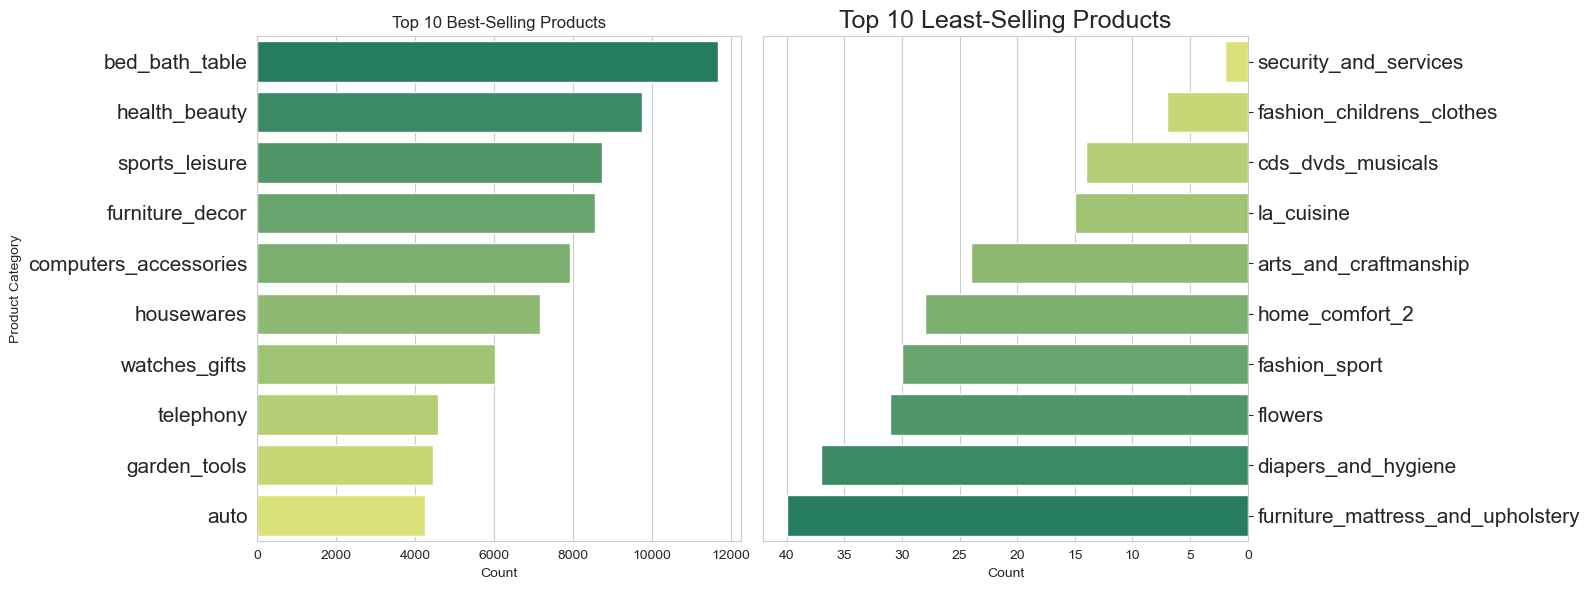

In [151]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 products
sns.barplot(x='products', y='product_category_name_english', data=top_order, palette='summer', ax=ax[0])
ax[0].set_title('Top 10 Best-Selling Products')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Product Category')
ax[0].tick_params(axis ='y', labelsize=15)

# Bottom 10 products
sns.barplot(x='products', y='product_category_name_english', data=bot_order, palette='summer_r', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Count')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 10 Least-Selling Products", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Adjust layout
plt.tight_layout()
plt.show()

#### Insight
Grafik diatas menjelaskan produk yang paling banyak terjual adalah bed_bath_table dengan jumlah 11685, dan produk yang paling sedikit terjual adalah security_and_services dengan jumlah.

### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan terhadap pelayanan yang telah diberikan? 

In [70]:
# mean review score
average_score = all_data['review_score'].mean()

print(f"The average customer review score is: {average_score:.2f}")


The average customer review score is: 4.08


<Figure size 800x600 with 0 Axes>

<AxesSubplot:xlabel='review_score'>

Text(0.5, 1.0, 'Distribution of Review Scores')

Text(0.5, 0, 'Review Score')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x25a486e7190>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

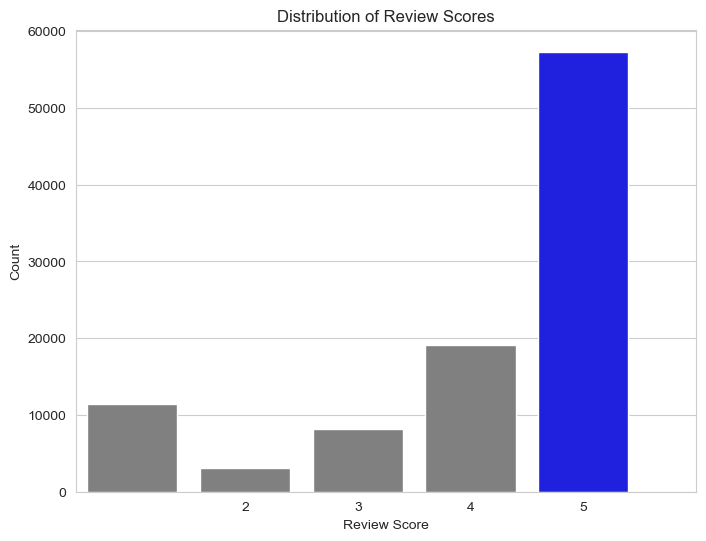

In [71]:
review_counts = order_reviews_df['review_score'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=review_counts.index, y=review_counts.values, palette=["Blue" if score == review_counts.idxmax()
 else "Gray" for score in review_counts.index])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()


#### Insight  
Kebanyakan dari customer merasa puas dengan layanan yang diberikan, hal ini dapat dilihat dari grafik diatas dan hasil rata-rata yang mencapai 4.08

### Pertanyaan 3: Provinsi mana yang memiliki banyak pelanggan ? 

In [132]:
def normalize_text(text):
    text = text.lower()
    text = text.strip()
    # Normalize Unicode characters (e.g., convert "ó" to "o")
    text = ''.join(
        char for char in unicodedata.normalize('NFKD', text) if not unicodedata.combining(char)
    )
    return text

In [90]:
# Aggregate customers by ZIP code
customer_count = cust_order_pay_rev_df.groupby('customer_zip_code_prefix').size().reset_index(name='customer_count')

In [91]:
# Merge dengan geolocation
geo_customer = pd.merge(
    customer_count,
    data['geolocation_df'],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

In [92]:
geo_customer.sample(5)

,customer_zip_code_prefix,customer_count,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
351535,15910,35,15910,-21.262633,-48.483939,monte alto,SP
362690,17210,13,17210,-22.283246,-48.541501,jau,SP
457134,23545,11,23545,-22.964325,-43.704817,rio de janeiro,RJ
736597,65049,1,65049,-2.559293,-44.236321,sao luis,MA
572859,34400,11,34400,-19.972020,-43.790453,raposos,MG


In [93]:
# Drop duplicate untuk ZIP code sama
geo_customer_grouped_with_location = geo_customer.drop_duplicates(
    subset='geolocation_zip_code_prefix'
)

In [ ]:
geo_customer_grouped_with_location['geolocation_city'] = geo_customer_grouped_with_location['geolocation_city'].apply(normalize_text)

In [139]:
# save geo_customer
geo_customer_grouped_with_location.to_csv('geo_cust.csv', index=False)

In [141]:

state_customer_counts = geo_customer_grouped_with_location.groupby('geolocation_state')['customer_count'].sum().reset_index()

state_customer_counts.rename(columns={'geolocation_state': 'State', 'customer_count': 'Total_Customers'}, inplace=True)

state_customer_counts = state_customer_counts.sort_values(by='Total_Customers', ascending=False)

state_customer_counts.head(10)


,State,Total_Customers
25,SP,43849
18,RJ,13601
10,MG,12162
22,RS,5703
17,PR,5271
23,SC,3770
4,BA,3618
8,GO,2122
7,ES,2111
6,DF,2046


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='geolocation_state'>

Text(0.5, 1.0, 'Customer Distribution by State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Customer Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'SP'),
  Text(1, 0, 'MG'),
  Text(2, 0, 'RJ'),
  Text(3, 0, 'RS'),
  Text(4, 0, 'PR'),
  Text(5, 0, 'BA'),
  Text(6, 0, 'GO'),
  Text(7, 0, 'SC'),
  Text(8, 0, 'PE'),
  Text(9, 0, 'DF'),
  Text(10, 0, 'CE'),
  Text(11, 0, 'ES'),
  Text(12, 0, 'PA'),
  Text(13, 0, 'MA'),
  Text(14, 0, 'MS'),
  Text(15, 0, 'PB'),
  Text(16, 0, 'RN'),
  Text(17, 0, 'MT'),
  Text(18, 0, 'PI'),
  Text(19, 0, 'AL'),
  Text(20, 0, 'TO'),
  Text(21, 0, 'SE'),
  Text(22, 0, 'RO'),
  Text(23, 0, 'AM'),
  Text(24, 0, 'AC'),
  Text(25, 0, 'AP'),
  Text(26, 0, 'RR')])

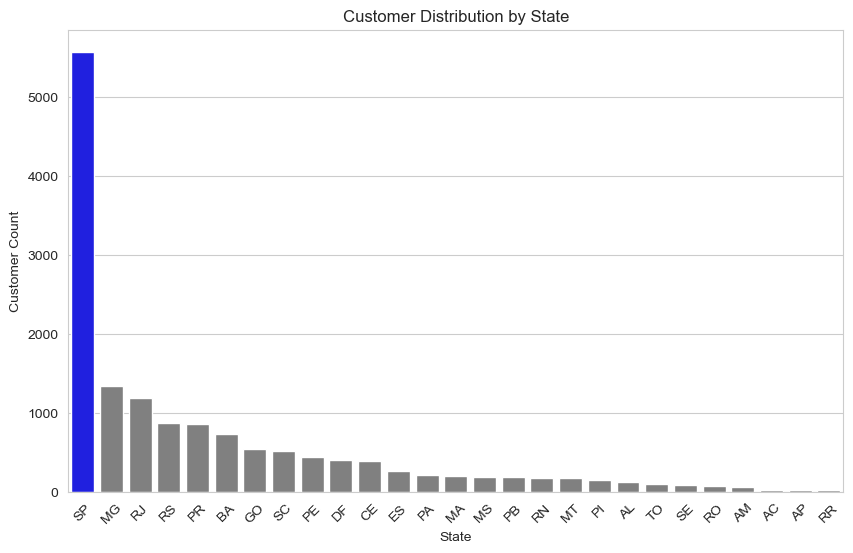

In [142]:
state_counts = geo_customer_grouped_with_location['geolocation_state'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=state_counts.index,
    y=state_counts.values,
    palette=["Blue" if state == state_counts.idxmax() else "Gray" for state in state_counts.index]
)
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.xticks(rotation=45) 
plt.show()

#### Insight
Customer banyak terkonsentrasi di provinsi Sao Paulo

### Analisis Lanjutan

Disini saya akan mencoba melakukan GeoSpacial analysis menggunakan library Folium, untuk mengetahui apakah ada Hotspot tertentu, memahami bagaimana trend geografis customer, dan memudahkan untuk memahami data karena ditampilkan secara visual 

Hitung Median latitude and longitude setiap ZIP code untuk mengurangi komputasi. Selain itu, tanpa grouping, zip code yang sama akan memiliki beberapa titik data yang saling meniban, sehingga menciptakan visual lebih berantakan dan membuat pola lebih sulit untuk diinterpretasikan. 

In [96]:
# Combine all city names into a single string for each ZIP code
geo_customer_grouped = geo_customer.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'median',
    'geolocation_lng': 'median',
    'customer_count': 'sum',
}).reset_index()

# Sort and display the results
geo_customer_grouped.sort_values(by='customer_count', ascending=False).head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,customer_count
6013,24220,-22.903166,-43.107131,160440
6014,24230,-22.906004,-43.105468,134444
5871,22790,-23.014295,-43.464132,98241
8103,38400,-18.914980,-48.278136,90710
7526,35500,-20.140685,-44.887531,79816


In [143]:
# Buat HeatMap
heatmap_data = geo_customer_grouped[['geolocation_lat', 'geolocation_lng', 'customer_count']].values

# Init Folium map
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)  # Centered in Brazil

# Add HeatMap layer
HeatMap(data=heatmap_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Display map
m

#### Insight
- Banyak customer berasal dari provinsi Sao Paulo dan disusul oleh provinsi Rio de Janeiro
- Pelanggan banyak terkonsentrasi di wilayah Selatan dan Tenggara, dapat dilihat dari HeatMap yang semakin berubah warnanya menuju merah

## Conclusion

- Produk apa yang paling laku dan tidak ?
  - Produk yang paling laku adalah kategori "bed_bath_table" dengan penjualan total 11685 unit. 
  - Produk yang paling tidak laku adalah kategori "security and services"" dengan penjualan total 2 unit saja.  
- Bagaimana tingkat kepuasan pelanggan terhadap pelayanan yang telah diberikan? 
  - Pelanggan cukup puas terhadap pelayanan diberikan, banyak pelanggan yang memberikan rating 5 diposisi pertama dan diikuti oleh rating 4. Hal ini juga diketahui dengan rata-rata tingkat kepuasan yang mencapai nilai 4.08
- Provinsi mana yang memiliki banyak pelanggan ? 
  - Provinsi yang memilik banyak pelanggan adalah Sao Paulo dengan total 43849 dan diikuti oleh Rio de Janeiro dengan total 13601, hal ini dapat dilihat dari visualisasi map yang dibuat, semakin merah warnanya maka customer semakin banyak